# Data exploration

After implementing several versions of frequency tables, and also implementing arithmetic coding algorithm itself, it worth to explore underlying structure of the given data. 

In [12]:
import matplotlib.pyplot as plt
import os

dir_path = os.getcwd()
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
TEST_DIR = '../test_files/'

In [13]:
dir_path

'/home/eduard/stuff/vatolin_course/archiver/data_exploration'

In [2]:
def get_freqs(file_name):
    dictionary = {x : 0 for x in range(0, 257)}
    with open(file_name, "rb") as file:
        while (byte := file.read(1)):
            dictionary[int.from_bytes(byte, "little")] +=1
    return dictionary.items()
def plot_frequencies(freqs):
    for byte, frequency in freqs:
        if frequency != 0:
            plt.plot(byte, frequency, 'ro')
    plt.show()

## test_1

In [3]:
freqs = get_freqs(TEST_DIR + "test_1")
plot_frequencies(freqs)

FileNotFoundError: [Errno 2] No such file or directory: 'archiver/test_files/test_1'

Nothing to mention here - a simple test which shows that our algorithm has it tendency to at least work.

## test_2.tif

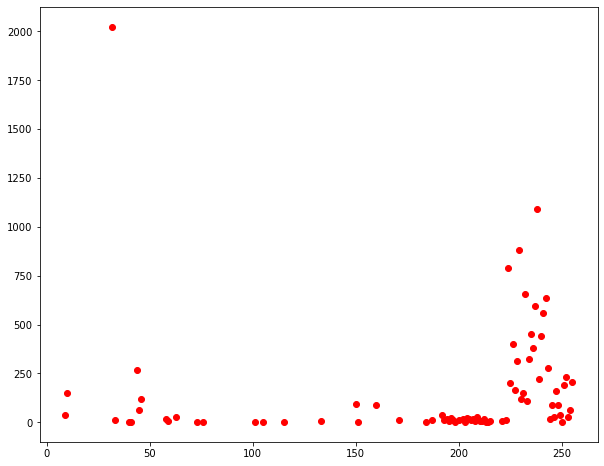

In [9]:
freqs = get_freqs(TEST_DIR + "test_2.tif")
plot_frequencies(freqs)

## test_3

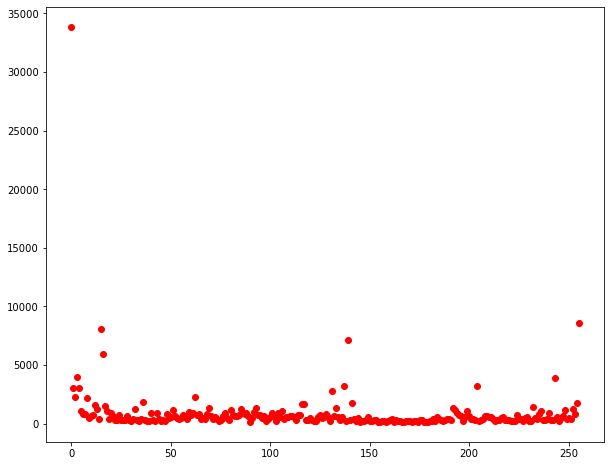

In [14]:
freqs = get_freqs(TEST_DIR + "test_3")
plot_frequencies(freqs)

test_3 is a .dll file

## test_4

In [11]:
freqs = get_freqs(TEST_DIR + "test_4")
plot_frequencies(freqs)

It is an empty test, and to be honest it allows us to think about amount of meta-data we put into our file.

I'll mention some popular cases :

1) Whole frequency table

When we use Static Frequency Table, we put it whole into our encoded file as an meta-data.
It'll take enormous amount of memory in term of files like this one - this file is empty, so it's size equal to 0 bytes, and at the same time Static Frequency Table consumes at least 256 bytes, and often even more.
So this solution definitely isn't the case in here.

## _ctypes.dll

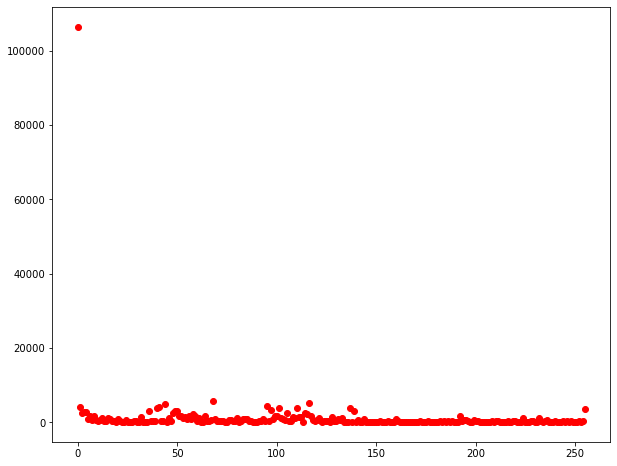

In [16]:
freqs = get_freqs(TEST_DIR + "_ctypes.dll")
plot_frequencies(freqs)

## attach_amd64.dll

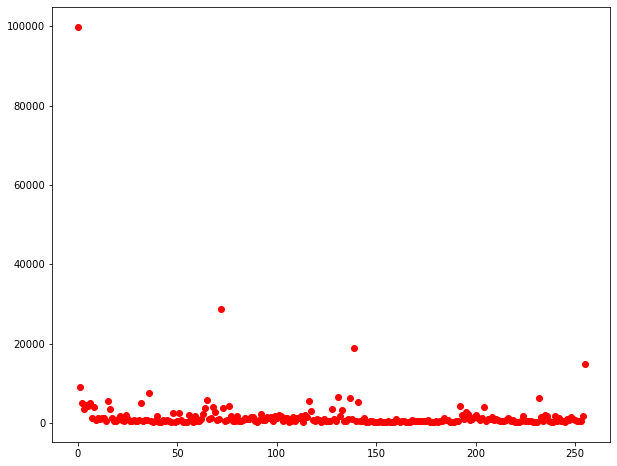

In [17]:
freqs = get_freqs(TEST_DIR + "attach_amd64.dll")
plot_frequencies(freqs)

## yjpagent64.dll

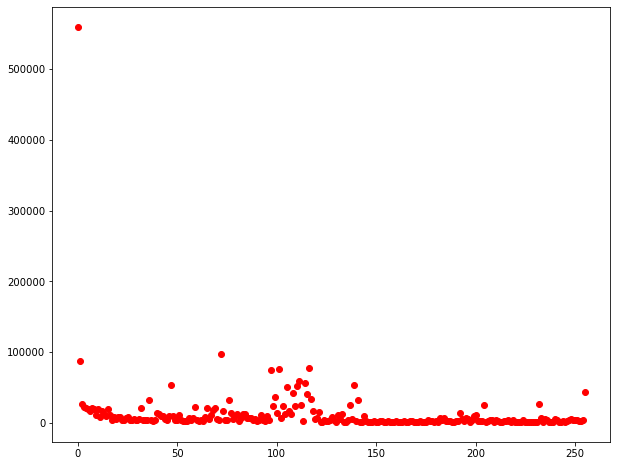

In [18]:
freqs = get_freqs(TEST_DIR + "yjpagent64.dll")
plot_frequencies(freqs)

All of the DLL's look kind of the same. 

I'm woundering, what'll happend if I'll try to overfit

These DLL's.

# Frequency table visualization 

In [153]:
import numpy as np
with open('table.txt') as f:
    array = [[int(x) for x in line.split()] for line in f]
#array = [x / np.sum(x) for x in array]

array = np.array(array)
iterations, _ = array.shape
size = 257
bins = 350
print("Bins : {}\nIterations : {}".format(bins, iterations))

Bins : 350
Iterations : 454


<IPython.core.display.Javascript object>


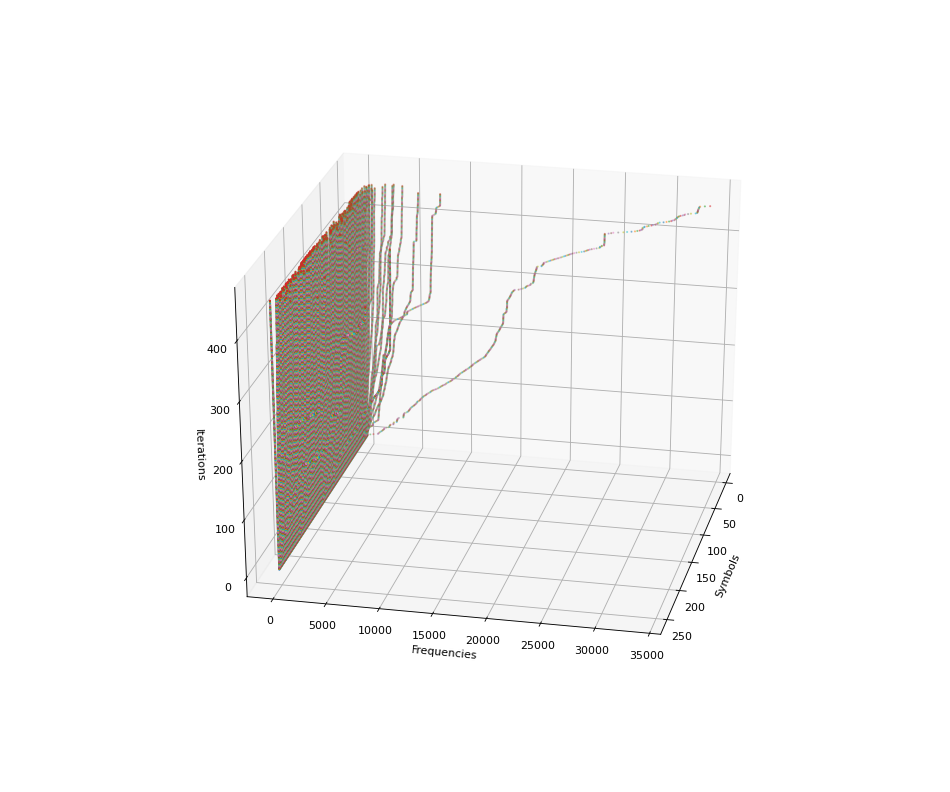

Text(0.5, 0, 'Iterations')

In [154]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('Symbols')
ax.set_ylabel('Frequencies')
ax.set_zlabel('Iterations')

In [155]:
for z in range(iterations):
    ax.scatter(range(size), array[z], zs=z, s=0.9, zdir='z')